In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/DataSets/prosperLoanData.csv')

In [4]:
import seaborn as sns

In [5]:
df.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [7]:
df.info

<bound method DataFrame.info of                      ListingKey  ListingNumber            ListingCreationDate  \
0       1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1       10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2       0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3       0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4       0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
...                         ...            ...                            ...   
113932  E6D9357655724827169606C         753087  2013-04-14 05:55:02.663000000   
113933  E6DB353036033497292EE43         537216  2011-11-03 20:42:55.333000000   
113934  E6E13596170052029692BB1        1069178  2013-12-13 05:49:12.703000000   
113935  E6EB3531504622671970D9E         539056  2011-11-14 13:18:26.597000000   
113936  E6ED3600409833199F711B7        1140093  2014-01-15 09:27:37.657000000

# EDA

# Introduction:

1.This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


2.The most critical tool in a P2P lending organization is its ability to assess a borrower’s creditworthiness as accurate as possible. Here, I am going to asses the tools used and to see if it is accurate in determining a person’s creditworthiness mainly Credit Grade and Prosper Score

Action: **presentation three main focuses are on the most critical part of Peer-to-Peer Lending which is CreditGrade , BorrowerRate and Lender Yield not to mention the custom built risk assesment tool called ProsperScore to assess the creditworthiness of the borrower.**

Research Question 1 : What are the most number of borrowers Credit Grade?.

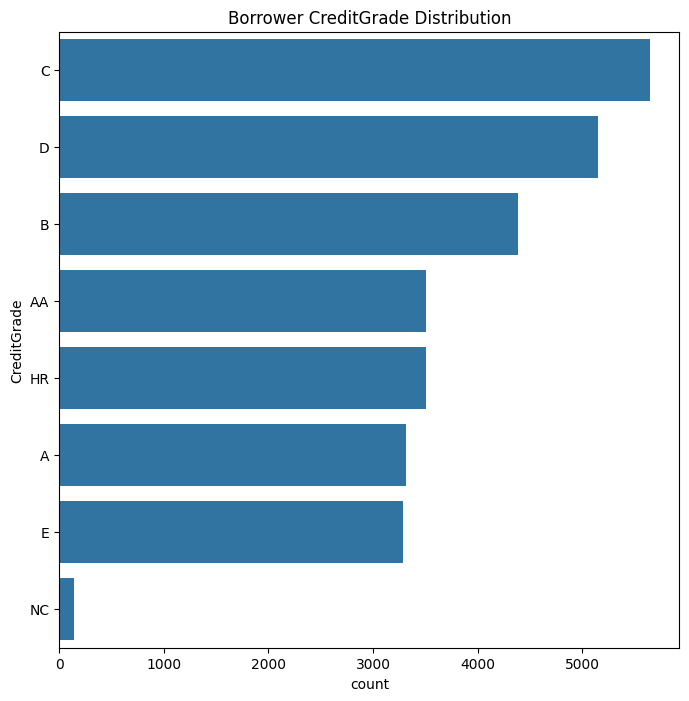

In [8]:
#Borrower CreditGrade Distribution
base_color = sns.color_palette()[0]
cat_order = df.CreditGrade.value_counts().index
plt.figure(figsize=[8, 8])
sns.countplot(data=df,y='CreditGrade',color=base_color, order=cat_order);
plt.title('Borrower CreditGrade Distribution');



##### CreditGrade 'C' has high Borrower CreditGrade.

Research Question 2 : Since there are so much low Credit Grade such as C and D , does it lead to a higher amount of deliquency?

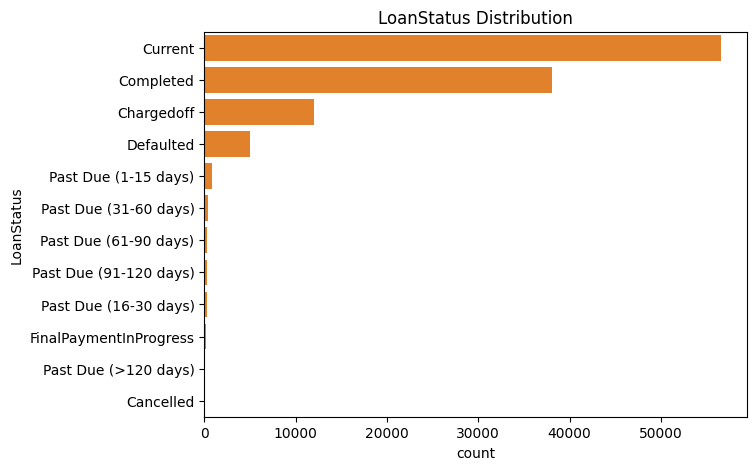

In [9]:
# Check the univariate relationship of Loan Status
#Borrower CreditGrade Distribution
base_color = sns.color_palette()[1]
cat_order = df.LoanStatus.value_counts().index
plt.figure(figsize=[7, 5])
sns.countplot(data=df,y='LoanStatus',color=base_color, order=cat_order);
plt.title('LoanStatus Distribution');

Research Question 3 : **What is the highest number of BorrowerRate?**

(array([6.3000e+01, 1.1966e+04, 2.5660e+04, 2.6902e+04, 1.8819e+04,
        1.7516e+04, 1.0953e+04, 2.0500e+03, 2.0000e+00, 6.0000e+00]),
 array([0.     , 0.04975, 0.0995 , 0.14925, 0.199  , 0.24875, 0.2985 ,
        0.34825, 0.398  , 0.44775, 0.4975 ]),
 <BarContainer object of 10 artists>)

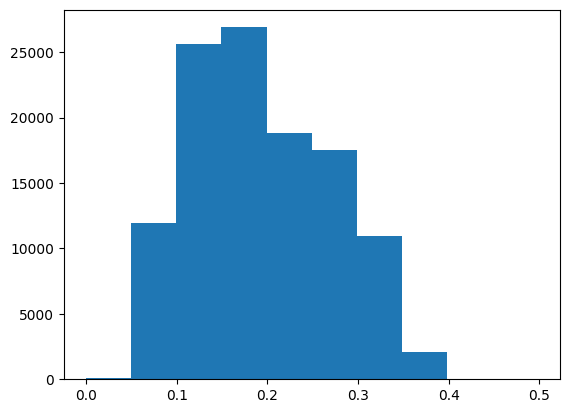

In [10]:
# Check the univariate relationship of Borrower rate
plt.hist(df['BorrowerRate'])

 The highest number of Borrower Rate is between 0.1 and 0.2

Research Question 4 : **Since the highest number of Borrower Rate
is between 0.1 and 0.2, does the highest number of Lender Yield is
between 0.1 and 0.2?**

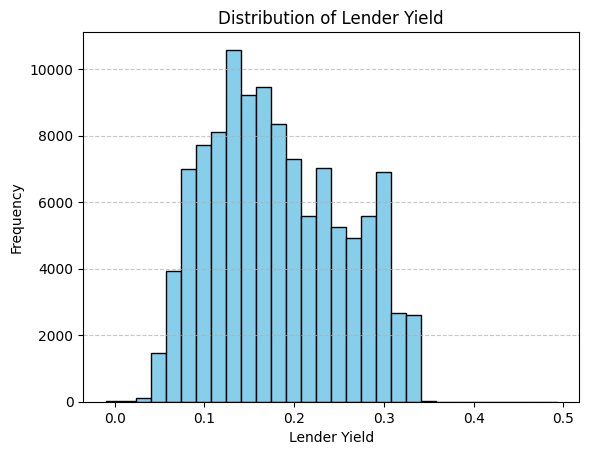

In [11]:
plt.hist(df['LenderYield'], bins=30, color='skyblue', edgecolor='black')

plt.title('Distribution of Lender Yield')
plt.xlabel('Lender Yield')
plt.ylabel('Frequency')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# we see that Lender Yield is nomarlly distributed with most of the values between 0.1 and 0.2


Research Question 5 : **Is the Credit Grade really accurate? Does
higher Credit Grade leads to higher Monthly Loan Payment? As for
Higher Credit Grade we mean from Grade AA to B**

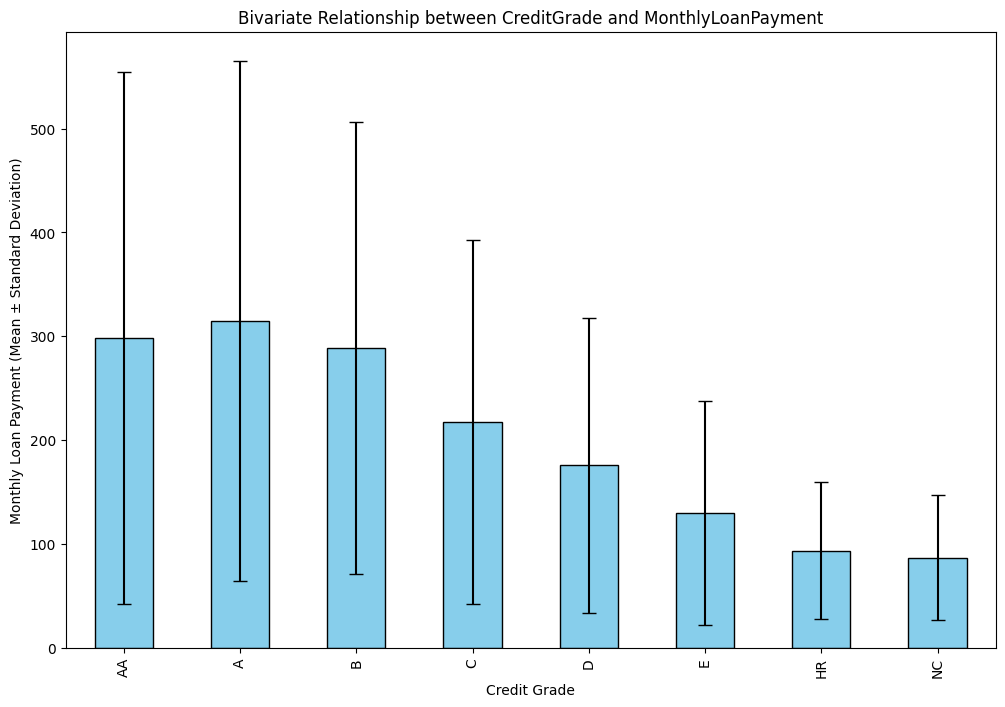

In [12]:
# Check the Bivariate Relationship between CreditGarde and MonthlyLoan Payment
grouped_data = df.groupby('CreditGrade')['MonthlyLoanPayment'].agg(['mean', 'std']).reindex(['AA', 'A', 'B','C','D','E','HR','NC'])

# Create a bar plot with error bars
plt.figure(figsize=(12, 8))
grouped_data['mean'].plot(kind='bar', yerr=grouped_data['std'], color='skyblue', edgecolor='black', capsize=5)
plt.title('Bivariate Relationship between CreditGrade and MonthlyLoanPayment')
plt.xlabel('Credit Grade')
plt.ylabel('Monthly Loan Payment (Mean ± Standard Deviation)')
plt.show()

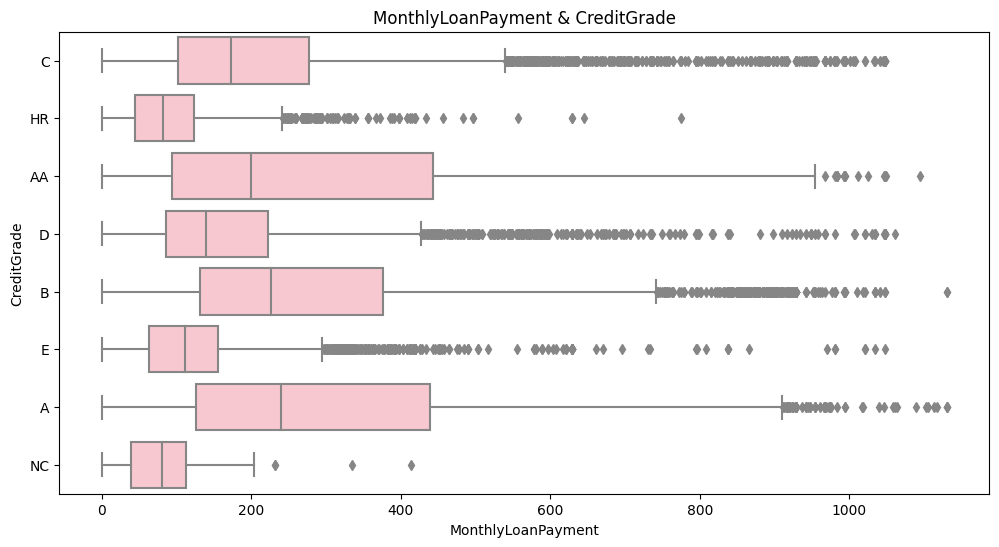

In [13]:
plt.figure(figsize = [12, 6])
sns.boxplot(data=df,x='MonthlyLoanPayment',y='CreditGrade',color='pink');
plt.xlabel('MonthlyLoanPayment');
plt.ylabel('CreditGrade');
plt.title('MonthlyLoanPayment & CreditGrade');

Yes higher credit grade leads to higher montlhy payments

Research Question 6 : **Here we look at the Completed Loan Status
and Defaulted Rate to determine the accuracy of Credit Grade.**

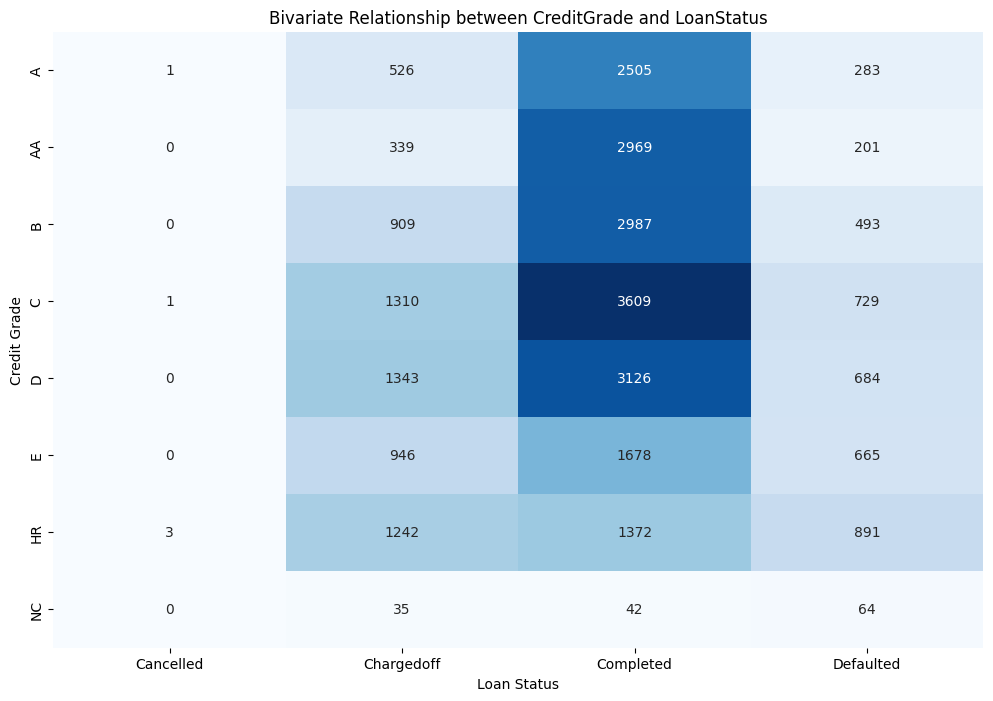

In [14]:
 # Check the Bivariate Relatonship between CreditGrade and LoanStatus
 contingency_table = pd.crosstab(df['CreditGrade'], df['LoanStatus'])

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Bivariate Relationship between CreditGrade and LoanStatus')
plt.xlabel('Loan Status')
plt.ylabel('Credit Grade')
plt.show()

Credit Grade seems to be accuarate.

Research Question 7 : **Now we know the Credit Grade is accurate
and is a tool that is used by the organization in determining the
person’s creditworthiness. Now we need to understand does the
ProsperScore, the custom built risk assesment system is being used
in determing borrower’s rate?**

From a theoretical standpoint, if the higher ProsperScore leads to lower Borrower Rate and Borrower Annual Percentage Rate that means the Prosper Score is being used alongside the Credit Grade in determing a person’s creditworthiness.

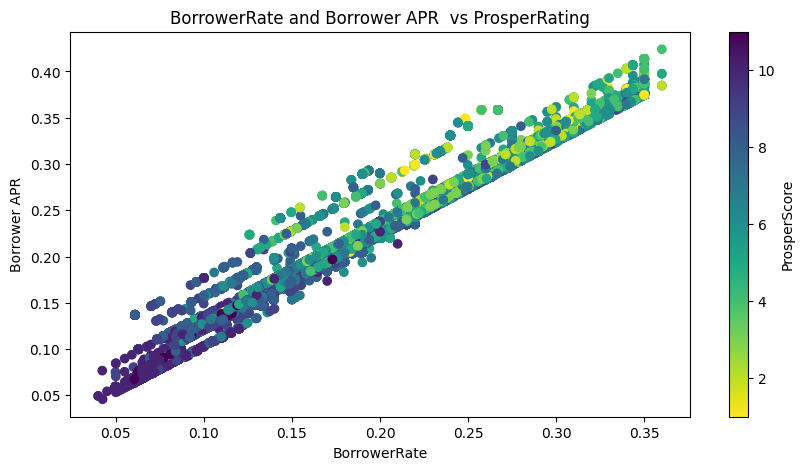

In [15]:
plt.figure(figsize = [10, 5])
plt.scatter(data=df,x='BorrowerRate',y = 'BorrowerAPR',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.xlabel('BorrowerRate')
plt.ylabel('Borrower APR')
plt.title('BorrowerRate and Borrower APR  vs ProsperRating');


**Business Insight**

Since the most important assest of a P2P lending Organization is its ability in using its tool to determine a borrower’s creditworthiness as accurate as possible. The organization would be more confident to market its organization as a great investment for investor to invest in hence leading to more borrower and higher market capitilization and boost revenue growth.

# Univariate Analysis

In [16]:
df.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ...  LP_ServiceFees  \
count             84853.000000  84853.000000  ...   113937.000000   
mean                  4.072243      5.950067  ...      -54.725641   
std                   1.673227      2.376501  ...       60.675425   
min                   1.000000      1.000000  ...     -664.870000   
25%                   3.000000      4.000000  ...      -73.180000   
50%                   4.000000      6.000000  ...      -34.440000   
75%                   5.000000      8.000000  ...      -13.920000   
max                   7.000000     11.000000  ...       32.060000   

       LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
count      113937.000000          113937.000000        113937.000000   
mean          -14.242698             700.446342           681.420499   
std           109.232758            2388.513831          2357.167068   
min         -9274.750000             -94.200000          -954.550000   
25%             0.000000               0.000000             0.000000   
50%             0.000000               0.000000             0.000000   
75%             0.000000               0.000000             0.000000   
max             0.000000           25000.000000         25000.000000   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
count                    113937.000000  113937.000000    113937.000000   
mean                         25.142686       0.998584         0.048027   
std                         275.657937       0.017919         0.332353   
min                           0.000000       0.700000         0.000000   
25%                           0.000000       1.000000         0.000000   
50%                           0.000000       1.000000         0.000000   
75%                           0.000000       1.000000         0.000000   
max                       21117.900000       1.012500        39.000000   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount      Investors  
count               113937.000000                113937.000000  113937.000000  
mean                     0.023460                    16.550751      80.475228  
std                      0.232412                   294.545422     103.239020  
min                      0.000000                     0.000000       1.000000  
25%                      0.000000                     0.000000       2.000000  
50%                      0.000000                     0.000000      44.000000  
75%                      0.000000                     0.000000     115.000000  
max                     33.000000                 25000.000000    1189.000000

In [17]:
df.median()

<ipython-input-17-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


ListingNumber                  600554.00000
Term                               36.00000
BorrowerAPR                         0.20976
BorrowerRate                        0.18400
LenderYield                         0.17300
                                   ...     
PercentFunded                       1.00000
Recommendations                     0.00000
InvestmentFromFriendsCount          0.00000
InvestmentFromFriendsAmount         0.00000
Investors                          44.00000
Length: 64, dtype: float64

In [18]:
df.mode()

ListingKey  ListingNumber            ListingCreationDate  \
0  17A93590655669644DB4C06         951186  2013-10-02 17:20:16.550000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36    Current  2014-03-04 00:00:00      0.35797   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.3177       0.3077  ...             0.0                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0         1  

[1 rows x 81 columns]

In [19]:
df.var()

<ipython-input-19-28ded241fd7c>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var()


ListingNumber                  1.076340e+11
Term                           1.089145e+02
BorrowerAPR                    6.458385e-03
BorrowerRate                   5.597798e-03
LenderYield                    5.552605e-03
                                   ...     
PercentFunded                  3.210843e-04
Recommendations                1.104585e-01
InvestmentFromFriendsCount     5.401533e-02
InvestmentFromFriendsAmount    8.675701e+04
Investors                      1.065830e+04
Length: 64, dtype: float64

In [20]:
numeric_columns = df.select_dtypes(include='number')
numeric_columns.max() - numeric_columns.min()

ListingNumber                  1.255721e+06
Term                           4.800000e+01
BorrowerAPR                    5.057600e-01
BorrowerRate                   4.975000e-01
LenderYield                    5.025000e-01
                                   ...     
PercentFunded                  3.125000e-01
Recommendations                3.900000e+01
InvestmentFromFriendsCount     3.300000e+01
InvestmentFromFriendsAmount    2.500000e+04
Investors                      1.188000e+03
Length: 61, dtype: float64

In [21]:
Q1 = numeric_columns.quantile(0.25,numeric_only=True)
Q3 = numeric_columns.quantile(0.75,numeric_only=True)
IQR = Q3 - Q1
print(IQR)

ListingNumber                  491715.00000
Term                                0.00000
BorrowerAPR                         0.12752
BorrowerRate                        0.11600
LenderYield                         0.11580
                                   ...     
PercentFunded                       0.00000
Recommendations                     0.00000
InvestmentFromFriendsCount          0.00000
InvestmentFromFriendsAmount         0.00000
Investors                         113.00000
Length: 61, dtype: float64


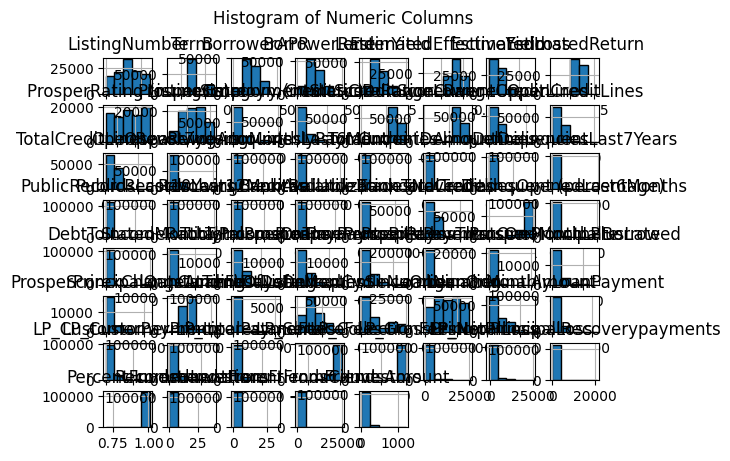

In [22]:
numeric_columns = df.select_dtypes(include='number')

# Create a histogram of numeric columns, ignoring NaN values
numeric_columns.hist(bins=5, edgecolor='black')
plt.suptitle('Histogram of Numeric Columns')
plt.show()

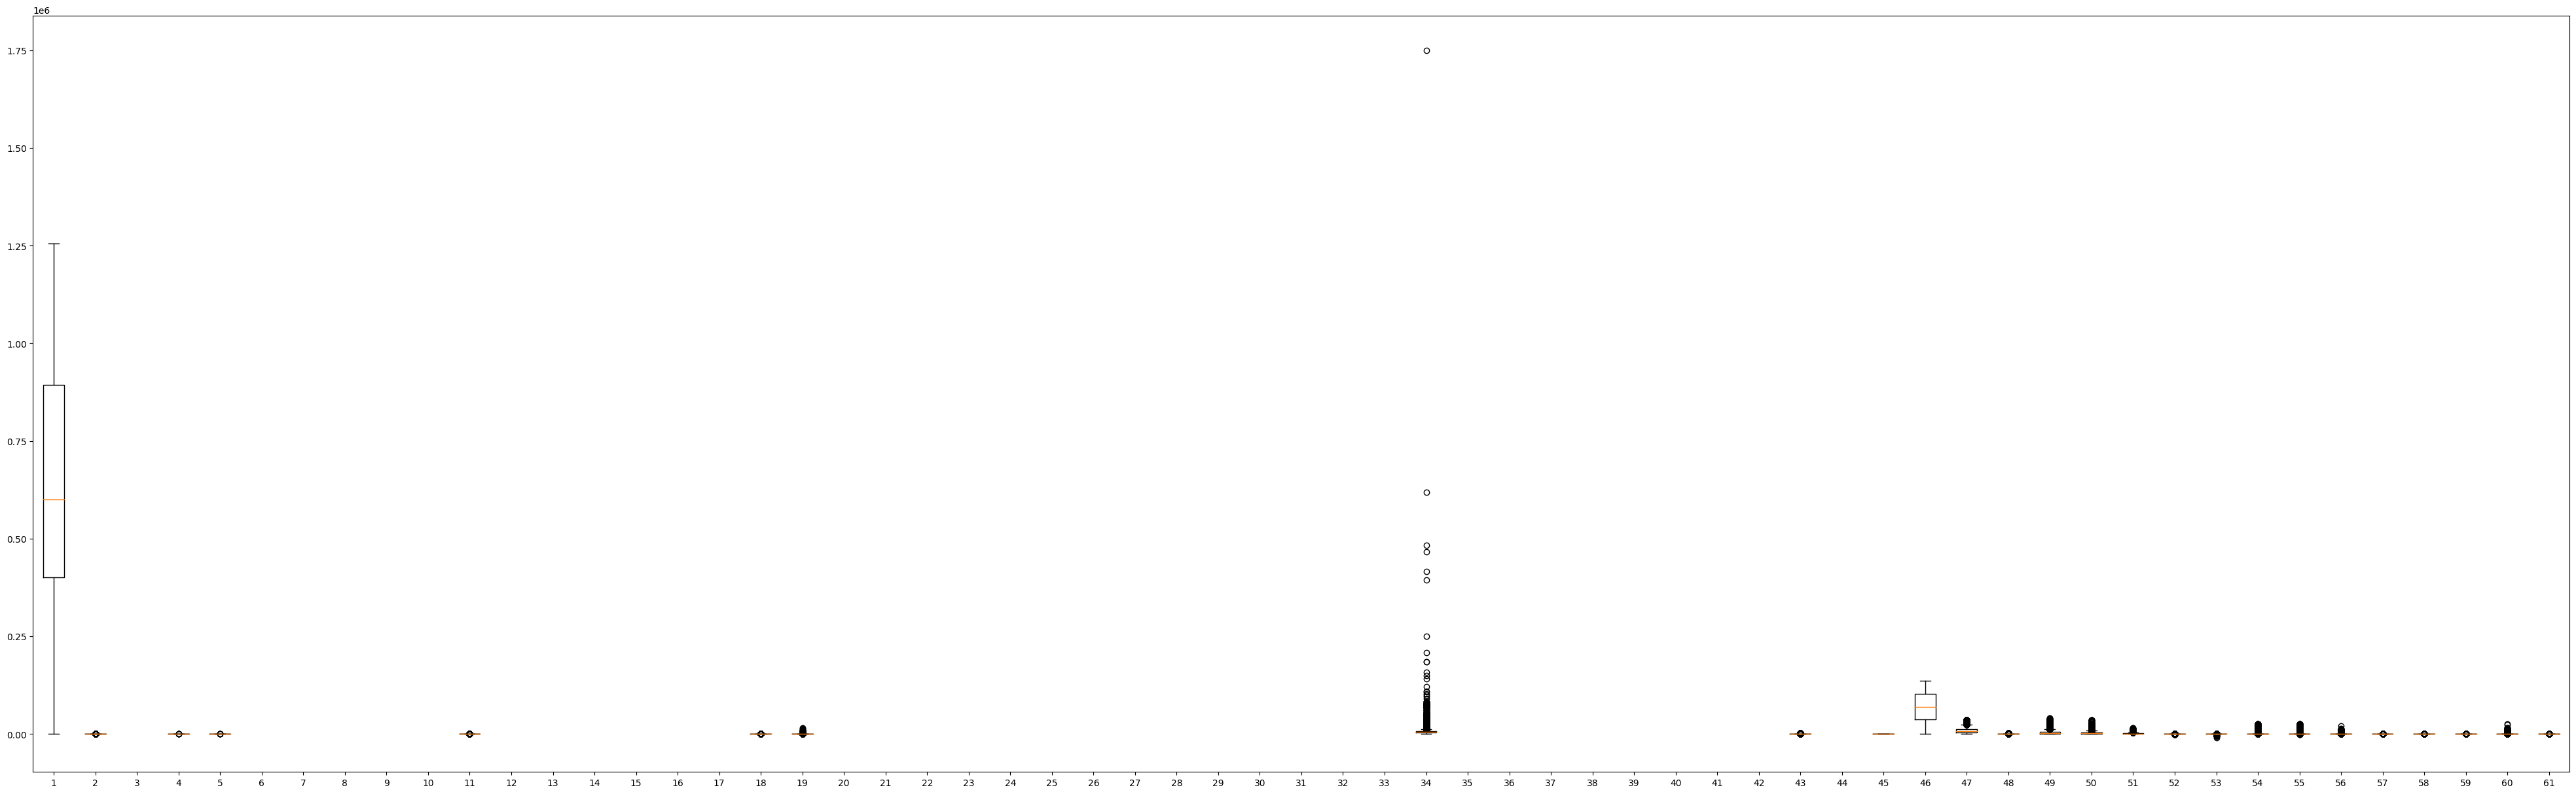

In [23]:
plt.figure(figsize=(50, 15))
plt.boxplot(numeric_columns)
plt.show()

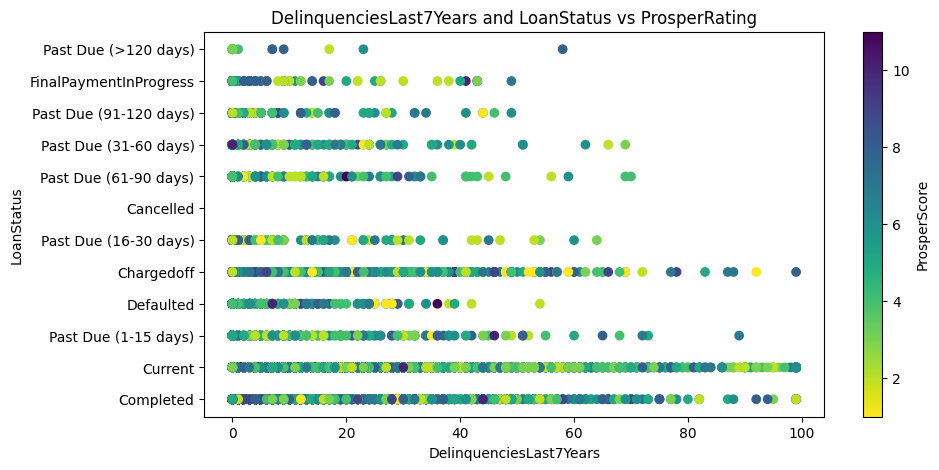

In [24]:
plt.figure(figsize = [10, 5])
plt.scatter(data=df,x='DelinquenciesLast7Years',y = 'LoanStatus',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.xlabel('DelinquenciesLast7Years')
plt.ylabel('LoanStatus')
plt.title('DelinquenciesLast7Years and LoanStatus vs ProsperRating');

<Axes: xlabel='count', ylabel='EmploymentStatus'>

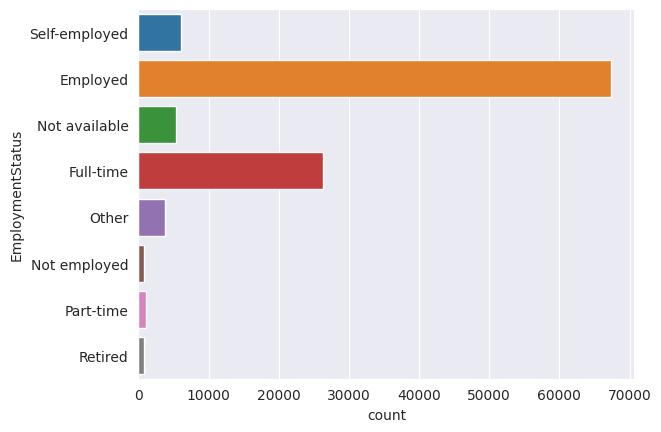

In [25]:
sns.set_style('darkgrid')
sns.countplot(y='EmploymentStatus',data=df)

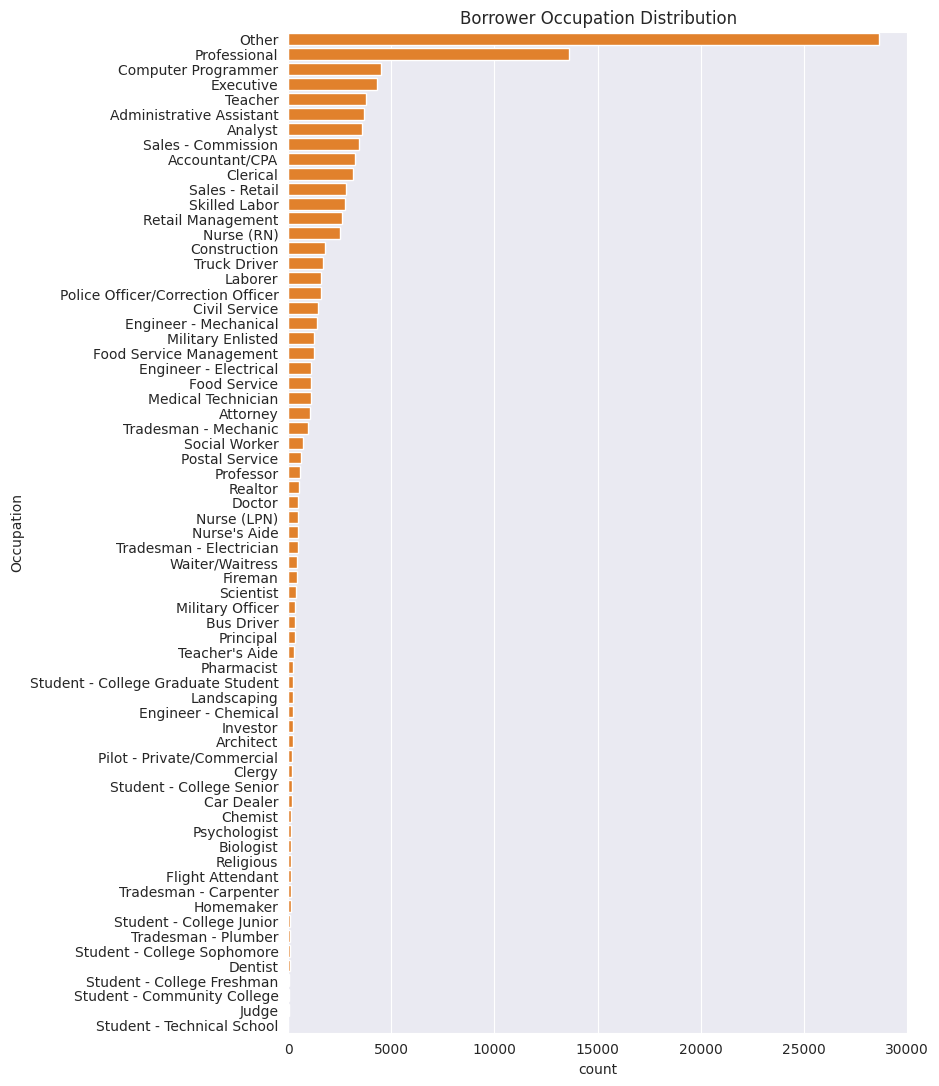

In [26]:
cat_order = df.Occupation.value_counts().index
plt.figure(figsize=[8, 13])
sns.countplot(data=df,y='Occupation',color=base_color, order=cat_order);
plt.title('Borrower Occupation Distribution');


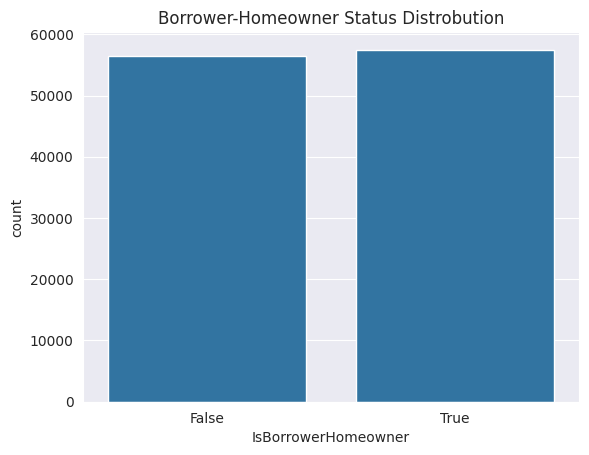

In [27]:
# #Is Borrower-Homeowner Status Distrobution
base_color = sns.color_palette()[0]
sns.countplot(data=df,x= 'IsBorrowerHomeowner',color=base_color);
plt.title('Borrower-Homeowner Status Distrobution')
plt.xlabel('IsBorrowerHomeowner');

<Axes: ylabel='TotalProsperLoans'>

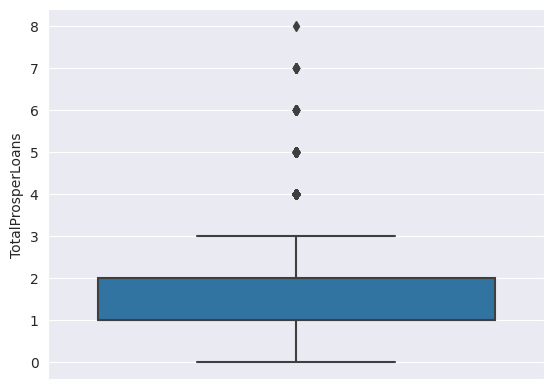

In [28]:
sns.boxplot(y='TotalProsperLoans',data=df)

# Bivariate Analysis

<ipython-input-29-4f86a4251680>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


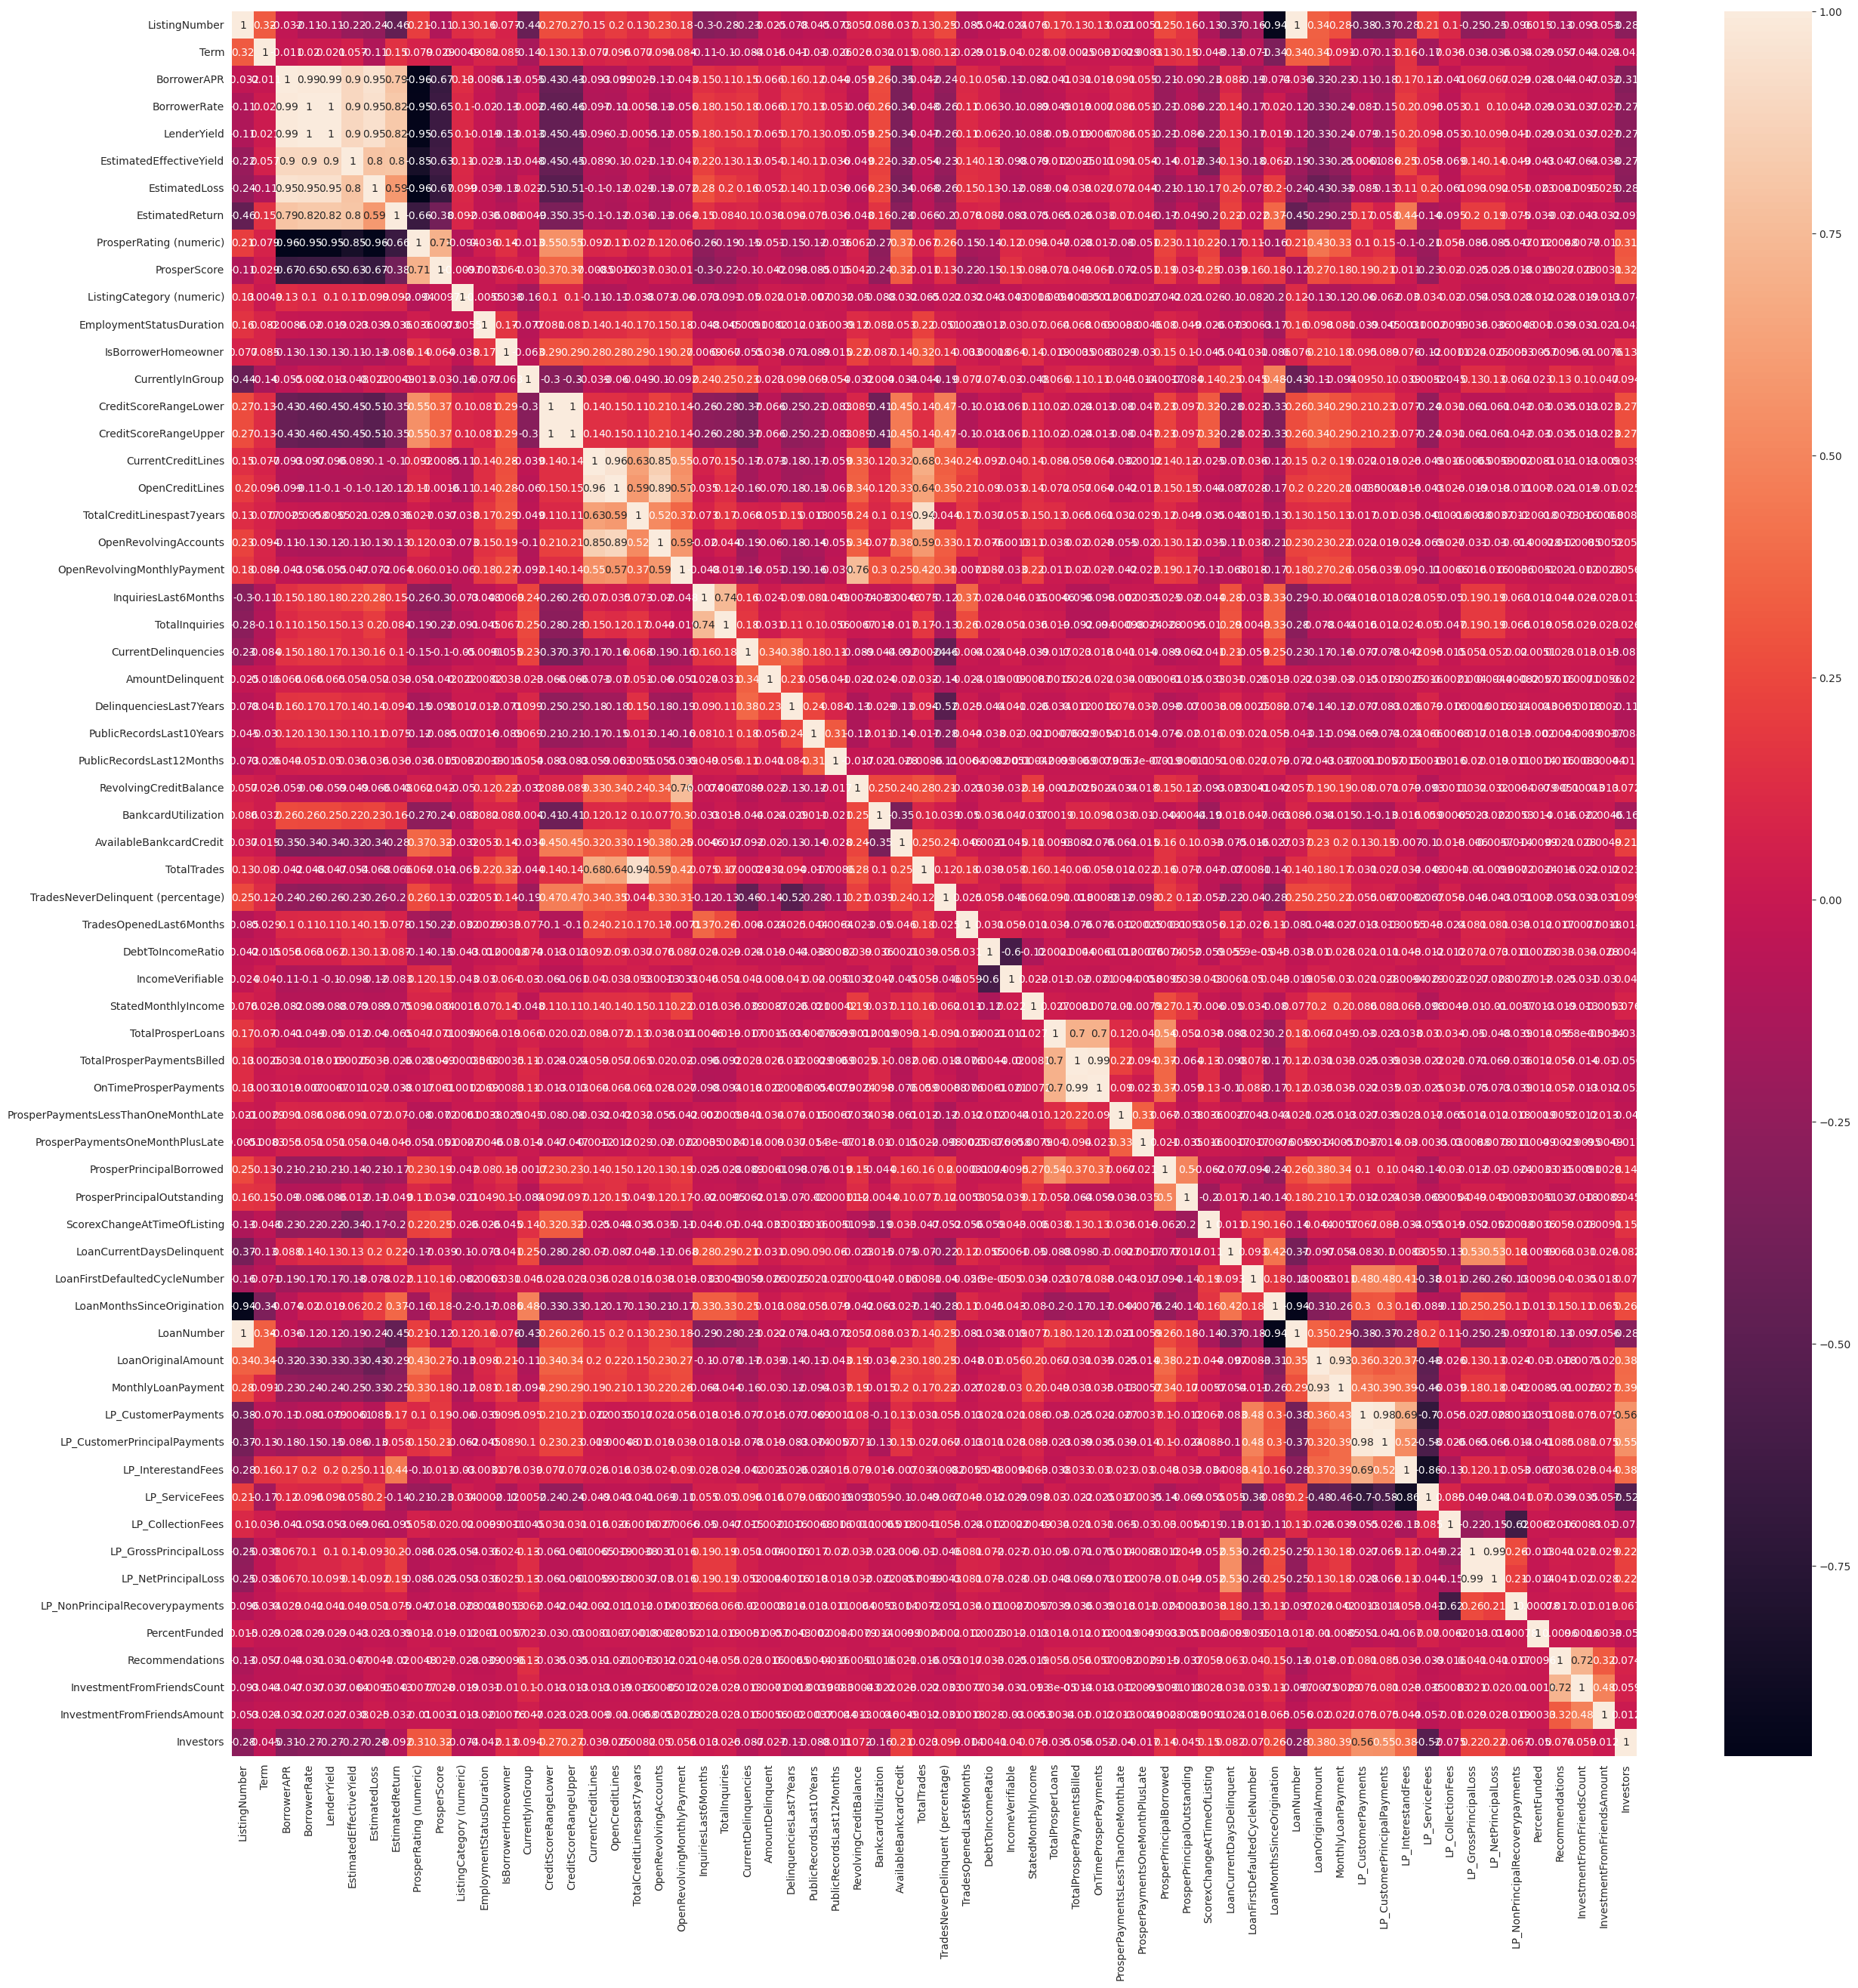

In [29]:
plt.figure(figsize = (30,30))
corr = df.corr()
sns.heatmap(corr, xticklabels = corr.columns.values,
yticklabels = corr.columns.values,
annot = True);

In [30]:
#plt.figure(figsize = (15,15))
#sns.pairplot(df, diag_kind='kde')


In [31]:
df["Status1"] = df["ClosedDate"].apply(lambda x: 1 if pd.isnull(x) else 0)
df["Status1"]

0         0
1         1
2         0
3         1
4         1
         ..
113932    1
113933    1
113934    1
113935    0
113936    1
Name: Status1, Length: 113937, dtype: int64

In [32]:
df["Status1"] = df["LoanCurrentDaysDelinquent"].apply(lambda x: 1 if x>180 else 0)
df["Status1"]

0         0
1         0
2         0
3         0
4         0
         ..
113932    0
113933    0
113934    0
113935    0
113936    0
Name: Status1, Length: 113937, dtype: int64

In [33]:
columns_to_keep= ['CreditGrade', 'IsBorrowerHomeowner','DebtToIncomeRatio','BorrowerRate']

# Use the loc method to select the desired columns
financial_strength = df.loc[:, columns_to_keep]
financial_strength.head()

CreditGrade  IsBorrowerHomeowner  DebtToIncomeRatio  BorrowerRate
0           C                 True               0.17        0.1580
1         NaN                False               0.18        0.0920
2          HR                False               0.06        0.2750
3         NaN                 True               0.15        0.0974
4         NaN                 True               0.26        0.2085

In [34]:
columns_to_keep = ['Recommendations','InvestmentFromFriendsCount','CurrentlyInGroup','LoanStatus']
social_strength = df.loc[:, columns_to_keep]
social_strength.head()

Recommendations  InvestmentFromFriendsCount  CurrentlyInGroup LoanStatus
0                0                           0              True  Completed
1                0                           0             False    Current
2                0                           0              True  Completed
3                0                           0             False    Current
4                0                           0             False    Current

In [35]:

dummies = pd.get_dummies(df['LoanStatus'])
dummies.head()

Cancelled  Chargedoff  Completed  Current  Defaulted  \
0          0           0          1        0          0   
1          0           0          0        1          0   
2          0           0          1        0          0   
3          0           0          0        1          0   
4          0           0          0        1          0   

   FinalPaymentInProgress  Past Due (1-15 days)  Past Due (16-30 days)  \
0                       0                     0                      0   
1                       0                     0                      0   
2                       0                     0                      0   
3                       0                     0                      0   
4                       0                     0                      0   

   Past Due (31-60 days)  Past Due (61-90 days)  Past Due (91-120 days)  \
0                      0                      0                       0   
1                      0                      0                       0   
2                      0                      0                       0   
3                      0                      0                       0   
4                      0                      0                       0   

   Past Due (>120 days)  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [36]:
#past due
# Calculate the sum of each column
column_sums = dummies.sum(axis = 0)

print(column_sums)


Cancelled                     5
Chargedoff                11992
Completed                 38074
Current                   56576
Defaulted                  5018
FinalPaymentInProgress      205
Past Due (1-15 days)        806
Past Due (16-30 days)       265
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (>120 days)         16
dtype: int64


In [37]:
pasDue = []
sum = 0
for ind in dummies.index:
    if((dummies['Past Due (1-15 days)'][ind] == 1) or (dummies['Past Due (16-30 days)'][ind] == 1) or (dummies['Past Due (31-60 days)'][ind] == 1) or (dummies['Past Due (61-90 days)'][ind] == 1) or (dummies['Past Due (91-120 days)'][ind] == 1) or (dummies['Past Due (>120 days)'][ind] == 1)):
      pasDue.append(1)
    else:
      pasDue.append(0)
for x in pasDue:
  if (x == 1):
    sum = sum + 1

print(sum)



2067


In [38]:
dummies["PastDue"] = pasDue
columns_to_check = ['Past Due (1-15 days)',
'Past Due (16-30 days)',
'Past Due (31-60 days)',
'Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)']
dummies_2 = dummies.drop(columns_to_check, axis=1)
dummies_2 = dummies_2.drop(['FinalPaymentInProgress', 'Cancelled'], axis = 1)

dummies_2.head()

Chargedoff  Completed  Current  Defaulted  PastDue
0           0          1        0          0        0
1           0          0        1          0        0
2           0          1        0          0        0
3           0          0        1          0        0
4           0          0        1          0        0

In [39]:
#adding the column status
dummies_2["Status"] = df["Status1"]
dummies_2.head()

Chargedoff  Completed  Current  Defaulted  PastDue  Status
0           0          1        0          0        0       0
1           0          0        1          0        0       0
2           0          1        0          0        0       0
3           0          0        1          0        0       0
4           0          0        1          0        0       0

In [40]:
dummies_2.groupby("Status").sum()

Chargedoff  Completed  Current  Defaulted  PastDue
Status                                                    
0              581      38074    56576       1366     2067
1            11411          0        0       3652        0

In [41]:
social_strength = pd.concat([social_strength, dummies_2], axis = 'columns')
social_strength.head()

Recommendations  InvestmentFromFriendsCount  CurrentlyInGroup LoanStatus  \
0                0                           0              True  Completed   
1                0                           0             False    Current   
2                0                           0              True  Completed   
3                0                           0             False    Current   
4                0                           0             False    Current   

   Chargedoff  Completed  Current  Defaulted  PastDue  Status  
0           0          1        0          0        0       0  
1           0          0        1          0        0       0  
2           0          1        0          0        0       0  
3           0          0        1          0        0       0  
4           0          0        1          0        0       0

In [42]:
group = social_strength.groupby('CurrentlyInGroup')
group.head()

Recommendations  InvestmentFromFriendsCount  CurrentlyInGroup  LoanStatus  \
0                 0                           0              True   Completed   
1                 0                           0             False     Current   
2                 0                           0              True   Completed   
3                 0                           0             False     Current   
4                 0                           0             False     Current   
5                 0                           0             False     Current   
6                 0                           0             False     Current   
17                0                           0              True  Chargedoff   
21                0                           0              True   Completed   
46                2                           1              True   Completed   

    Chargedoff  Completed  Current  Defaulted  PastDue  Status  
0            0          1        0          0        0       0  
1            0          0        1          0        0       0  
2            0          1        0          0        0       0  
3            0          0        1          0        0       0  
4            0          0        1          0        0       0  
5            0          0        1          0        0       0  
6            0          0        1          0        0       0  
17           1          0        0          0        0       1  
21           0          1        0          0        0       0  
46           0          1        0          0        0       0

In [43]:
social_strength.isnull().sum()

Recommendations               0
InvestmentFromFriendsCount    0
CurrentlyInGroup              0
LoanStatus                    0
Chargedoff                    0
Completed                     0
Current                       0
Defaulted                     0
PastDue                       0
Status                        0
dtype: int64

In [44]:
financial_strength.isnull().sum()

CreditGrade            84984
IsBorrowerHomeowner        0
DebtToIncomeRatio       8554
BorrowerRate               0
dtype: int64

In [45]:
financial_strength.dropna(inplace = True)

financial_strength.isnull().sum()

CreditGrade            0
IsBorrowerHomeowner    0
DebtToIncomeRatio      0
BorrowerRate           0
dtype: int64

In [48]:
cross_tab = pd.crosstab(social_strength.Status, social_strength.CurrentlyInGroup, margins = True)

In [49]:
cross_tab = pd.crosstab(social_strength.Status, social_strength.CurrentlyInGroup, margins = False)

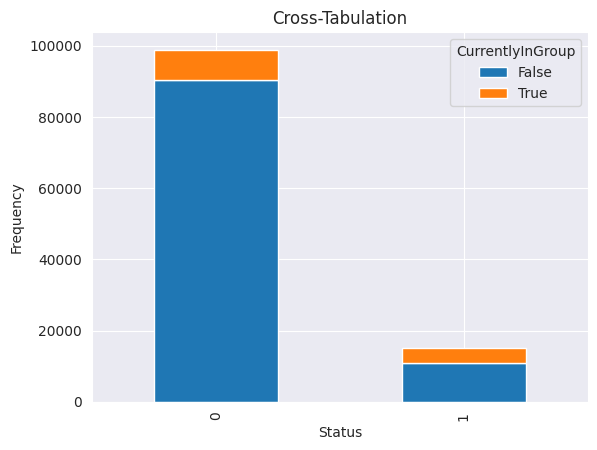

In [51]:
cross_tab.plot(kind='bar', stacked=True)
plt.title('Cross-Tabulation')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.show()

# Feature Engineering

In [52]:
df.shape

(113937, 82)

**Fixing Date-Time Columns**

In [53]:
# Changing Loan orgination date into date time format
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])

In [54]:
# Changing Loan orgination date into date time format
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'])

In [55]:
df['LoanOriginationDateYear'] = df['LoanOriginationDate'].dt.year
df['LoanOriginationDateMonth'] = df['LoanOriginationDate'].dt.month
df['LoanOriginationDateDay'] = df['LoanOriginationDate'].dt.day

In [56]:
df['ListingCreationDateYear'] = df['ListingCreationDate'].dt.year
df['ListingCreationDateMonth'] = df['ListingCreationDate'].dt.month
df['ListingCreationDateDay'] = df['ListingCreationDate'].dt.day

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 88 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   object        
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

In [58]:
df_loan = df.copy()

# Dropping Columns

In [59]:
# Dropping columns
df_loan.drop(['ListingKey','ListingNumber','LoanKey','GroupKey','ListingCreationDate','LoanOriginationDate'], axis =1, inplace = True)
df_loan.head()


CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0        0.1580       0.1380                      NaN            NaN   
1        0.0920       0.0820                  0.07960         0.0249   
2        0.2750       0.2400                      NaN            NaN   
3        0.0974       0.0874                  0.08490         0.0249   
4        0.2085       0.1985                  0.18316         0.0925   

   EstimatedReturn  ...  InvestmentFromFriendsCount  \
0              NaN  ...                           0   
1          0.05470  ...                           0   
2              NaN  ...                           0   
3          0.06000  ...                           0   
4          0.09066  ...                           0   

  InvestmentFromFriendsAmount  Investors  Status1 LoanOriginationDateYear  \
0                         0.0        258        0                    2007   
1                         0.0          1        0                    2014   
2                         0.0         41        0                    2007   
3                         0.0        158        0                    2012   
4                         0.0         20        0                    2013   

  LoanOriginationDateMonth LoanOriginationDateDay  ListingCreationDateYear  \
0                        9                     12                     2007   
1                        3                      3                     2014   
2                        1                     17                     2007   
3                       11                      1                     2012   
4                        9                     20                     2013   

   ListingCreationDateMonth  ListingCreationDateDay  
0                         8                      26  
1                         2                      27  
2                         1                       5  
3                        10                      22  
4                         9                      14  

[5 rows x 82 columns]

In [60]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 82 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   CreditGrade                          28953 non-null   object 
 1   Term                                 113937 non-null  int64  
 2   LoanStatus                           113937 non-null  object 
 3   ClosedDate                           55089 non-null   object 
 4   BorrowerAPR                          113912 non-null  float64
 5   BorrowerRate                         113937 non-null  float64
 6   LenderYield                          113937 non-null  float64
 7   EstimatedEffectiveYield              84853 non-null   float64
 8   EstimatedLoss                        84853 non-null   float64
 9   EstimatedReturn                      84853 non-null   float64
 10  ProsperRating (numeric)              84853 non-null   float64
 11  ProsperRating

# Fixing Missing Values

In [61]:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the null values
print(df_loan.isnull().sum())

CreditGrade                            84984
Term                                       0
LoanStatus                                 0
ClosedDate                             58848
BorrowerAPR                               25
BorrowerRate                               0
LenderYield                                0
EstimatedEffectiveYield                29084
EstimatedLoss                          29084
EstimatedReturn                        29084
ProsperRating (numeric)                29084
ProsperRating (Alpha)                  29084
ProsperScore                           29084
ListingCategory (numeric)                  0
BorrowerState                           5515
Occupation                              3588
EmploymentStatus                        2255
EmploymentStatusDuration                7625
IsBorrowerHomeowner                        0
CurrentlyInGroup                           0
DateCreditPulled                           0
CreditScoreRangeLower                    591
CreditScor

In [62]:
# All are categorical data so we use mode concept
cols = ['ClosedDate','ProsperRating (Alpha)','BorrowerState','Occupation','EmploymentStatus','FirstRecordedCreditLine']


for i in cols:
    df_loan[i].fillna(df_loan[i].mode()[0], inplace=True)
    print(i)


ClosedDate
ProsperRating (Alpha)
BorrowerState
Occupation
EmploymentStatus
FirstRecordedCreditLine


In [63]:
### All are numerical columns so we use mean concept.
cols =['BorrowerAPR','CreditScoreRangeLower','CreditScoreRangeUpper','ProsperScore','EmploymentStatusDuration','CurrentCreditLines','OpenCreditLines','TotalCreditLinespast7years','InquiriesLast6Months','TotalInquiries',
      'CurrentDelinquencies','AmountDelinquent','DelinquenciesLast7Years','PublicRecordsLast10Years','PublicRecordsLast12Months','RevolvingCreditBalance','BankcardUtilization','AvailableBankcardCredit','TotalTrades',
      'TradesNeverDelinquent (percentage)','TradesOpenedLast6Months','DebtToIncomeRatio','ScorexChangeAtTimeOfListing','LoanFirstDefaultedCycleNumber','TotalProsperLoans', 'TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding',
       'EstimatedEffectiveYield',
'EstimatedLoss',
'EstimatedReturn',
'ProsperRating (numeric)']


for i in cols:
    df_loan[i].fillna(df_loan[i].mean(), inplace=True)
    print(i)

BorrowerAPR
CreditScoreRangeLower
CreditScoreRangeUpper
ProsperScore
EmploymentStatusDuration
CurrentCreditLines
OpenCreditLines
TotalCreditLinespast7years
InquiriesLast6Months
TotalInquiries
CurrentDelinquencies
AmountDelinquent
DelinquenciesLast7Years
PublicRecordsLast10Years
PublicRecordsLast12Months
RevolvingCreditBalance
BankcardUtilization
AvailableBankcardCredit
TotalTrades
TradesNeverDelinquent (percentage)
TradesOpenedLast6Months
DebtToIncomeRatio
ScorexChangeAtTimeOfListing
LoanFirstDefaultedCycleNumber
TotalProsperLoans
TotalProsperPaymentsBilled
OnTimeProsperPayments
ProsperPaymentsLessThanOneMonthLate
ProsperPaymentsOneMonthPlusLate
ProsperPrincipalBorrowed
ProsperPrincipalOutstanding
EstimatedEffectiveYield
EstimatedLoss
EstimatedReturn
ProsperRating (numeric)


In [64]:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the null values
print(df_loan.isnull().sum())


CreditGrade                            84984
Term                                       0
LoanStatus                                 0
ClosedDate                                 0
BorrowerAPR                                0
BorrowerRate                               0
LenderYield                                0
EstimatedEffectiveYield                    0
EstimatedLoss                              0
EstimatedReturn                            0
ProsperRating (numeric)                    0
ProsperRating (Alpha)                      0
ProsperScore                               0
ListingCategory (numeric)                  0
BorrowerState                              0
Occupation                                 0
EmploymentStatus                           0
EmploymentStatusDuration                   0
IsBorrowerHomeowner                        0
CurrentlyInGroup                           0
DateCreditPulled                           0
CreditScoreRangeLower                      0
CreditScor

In [65]:
df_noCd = df_loan

In [66]:
df_noCd.dropna(subset=['CreditGrade'], inplace=True)

In [67]:
df_Cd = df_loan

df_Cd['CreditGrade'].fillna(df_Cd['CreditGrade'].mode(), inplace=True)


In [68]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the null values
print(df_Cd.isnull().sum())


CreditGrade                            0
Term                                   0
LoanStatus                             0
ClosedDate                             0
BorrowerAPR                            0
BorrowerRate                           0
LenderYield                            0
EstimatedEffectiveYield                0
EstimatedLoss                          0
EstimatedReturn                        0
ProsperRating (numeric)                0
ProsperRating (Alpha)                  0
ProsperScore                           0
ListingCategory (numeric)              0
BorrowerState                          0
Occupation                             0
EmploymentStatus                       0
EmploymentStatusDuration               0
IsBorrowerHomeowner                    0
CurrentlyInGroup                       0
DateCreditPulled                       0
CreditScoreRangeLower                  0
CreditScoreRangeUpper                  0
FirstRecordedCreditLine                0
CurrentCreditLin

In [69]:
df_Cd.head()

CreditGrade  Term  LoanStatus           ClosedDate  BorrowerAPR  \
0            C    36   Completed  2009-08-14 00:00:00      0.16516   
2           HR    36   Completed  2009-12-17 00:00:00      0.28269   
11           C    36   Completed  2008-01-07 00:00:00      0.15033   
17          AA    36  Chargedoff  2008-05-22 00:00:00      0.13202   
21           D    36   Completed  2010-12-12 00:00:00      0.21488   

    BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0         0.1580       0.1380                 0.168661       0.080306   
2         0.2750       0.2400                 0.168661       0.080306   
11        0.1325       0.1225                 0.168661       0.080306   
17        0.1250       0.1175                 0.168661       0.080306   
21        0.2075       0.1975                 0.168661       0.080306   

    EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
0          0.096068                 4.072243                     C   
2          0.096068                 4.072243                     C   
11         0.096068                 4.072243                     C   
17         0.096068                 4.072243                     C   
21         0.096068                 4.072243                     C   

    ProsperScore  ListingCategory (numeric) BorrowerState       Occupation  \
0       5.950067                          0            CO            Other   
2       5.950067                          0            GA            Other   
11      5.950067                          0            CA  Waiter/Waitress   
17      5.950067                          0            CA     Professional   
21      5.950067                          0            MI     Professional   

   EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0     Self-employed                  2.000000                 True   
2     Not available                 96.071582                False   
11        Full-time                 19.000000                False   
17    Not available                 96.071582                 True   
21        Full-time                 36.000000                False   

    CurrentlyInGroup               DateCreditPulled  CreditScoreRangeLower  \
0               True  2007-08-26 18:41:46.780000000                  640.0   
2               True  2007-01-02 14:09:10.060000000                  480.0   
11             False  2007-10-08 13:13:44.363000000                  640.0   
17              True  2006-08-15 10:56:13.020000000                  760.0   
21              True  2007-11-11 14:24:41.350000000                  620.0   

    CreditScoreRangeUpper FirstRecordedCreditLine  CurrentCreditLines  \
0                   659.0     2001-10-11 00:00:00            5.000000   
2                   499.0     2002-07-27 00:00:00           10.317192   
11                  659.0     2000-11-13 00:00:00            2.000000   
17                  779.0     1990-05-19 00:00:00           10.317192   
21                  639.0     2003-06-20 00:00:00            4.000000   

    OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  \
0          4.000000                        12.0                      1   
2          9.260164                         3.0                      0   
11         2.000000                        10.0                      1   
17         9.260164                        36.0                     16   
21         4.000000                        13.0                      3   

    OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
0                          24.0                   3.0             3.0   
2                           0.0                   0.0             1.0   
11                         40.0                   3.0             5.0   
17                        346.0                   7.0            17.0   
21                         15.0                   0.0             8.0   

    CurrentDelinquencies  AmountDelinque

# Correlation Matrix

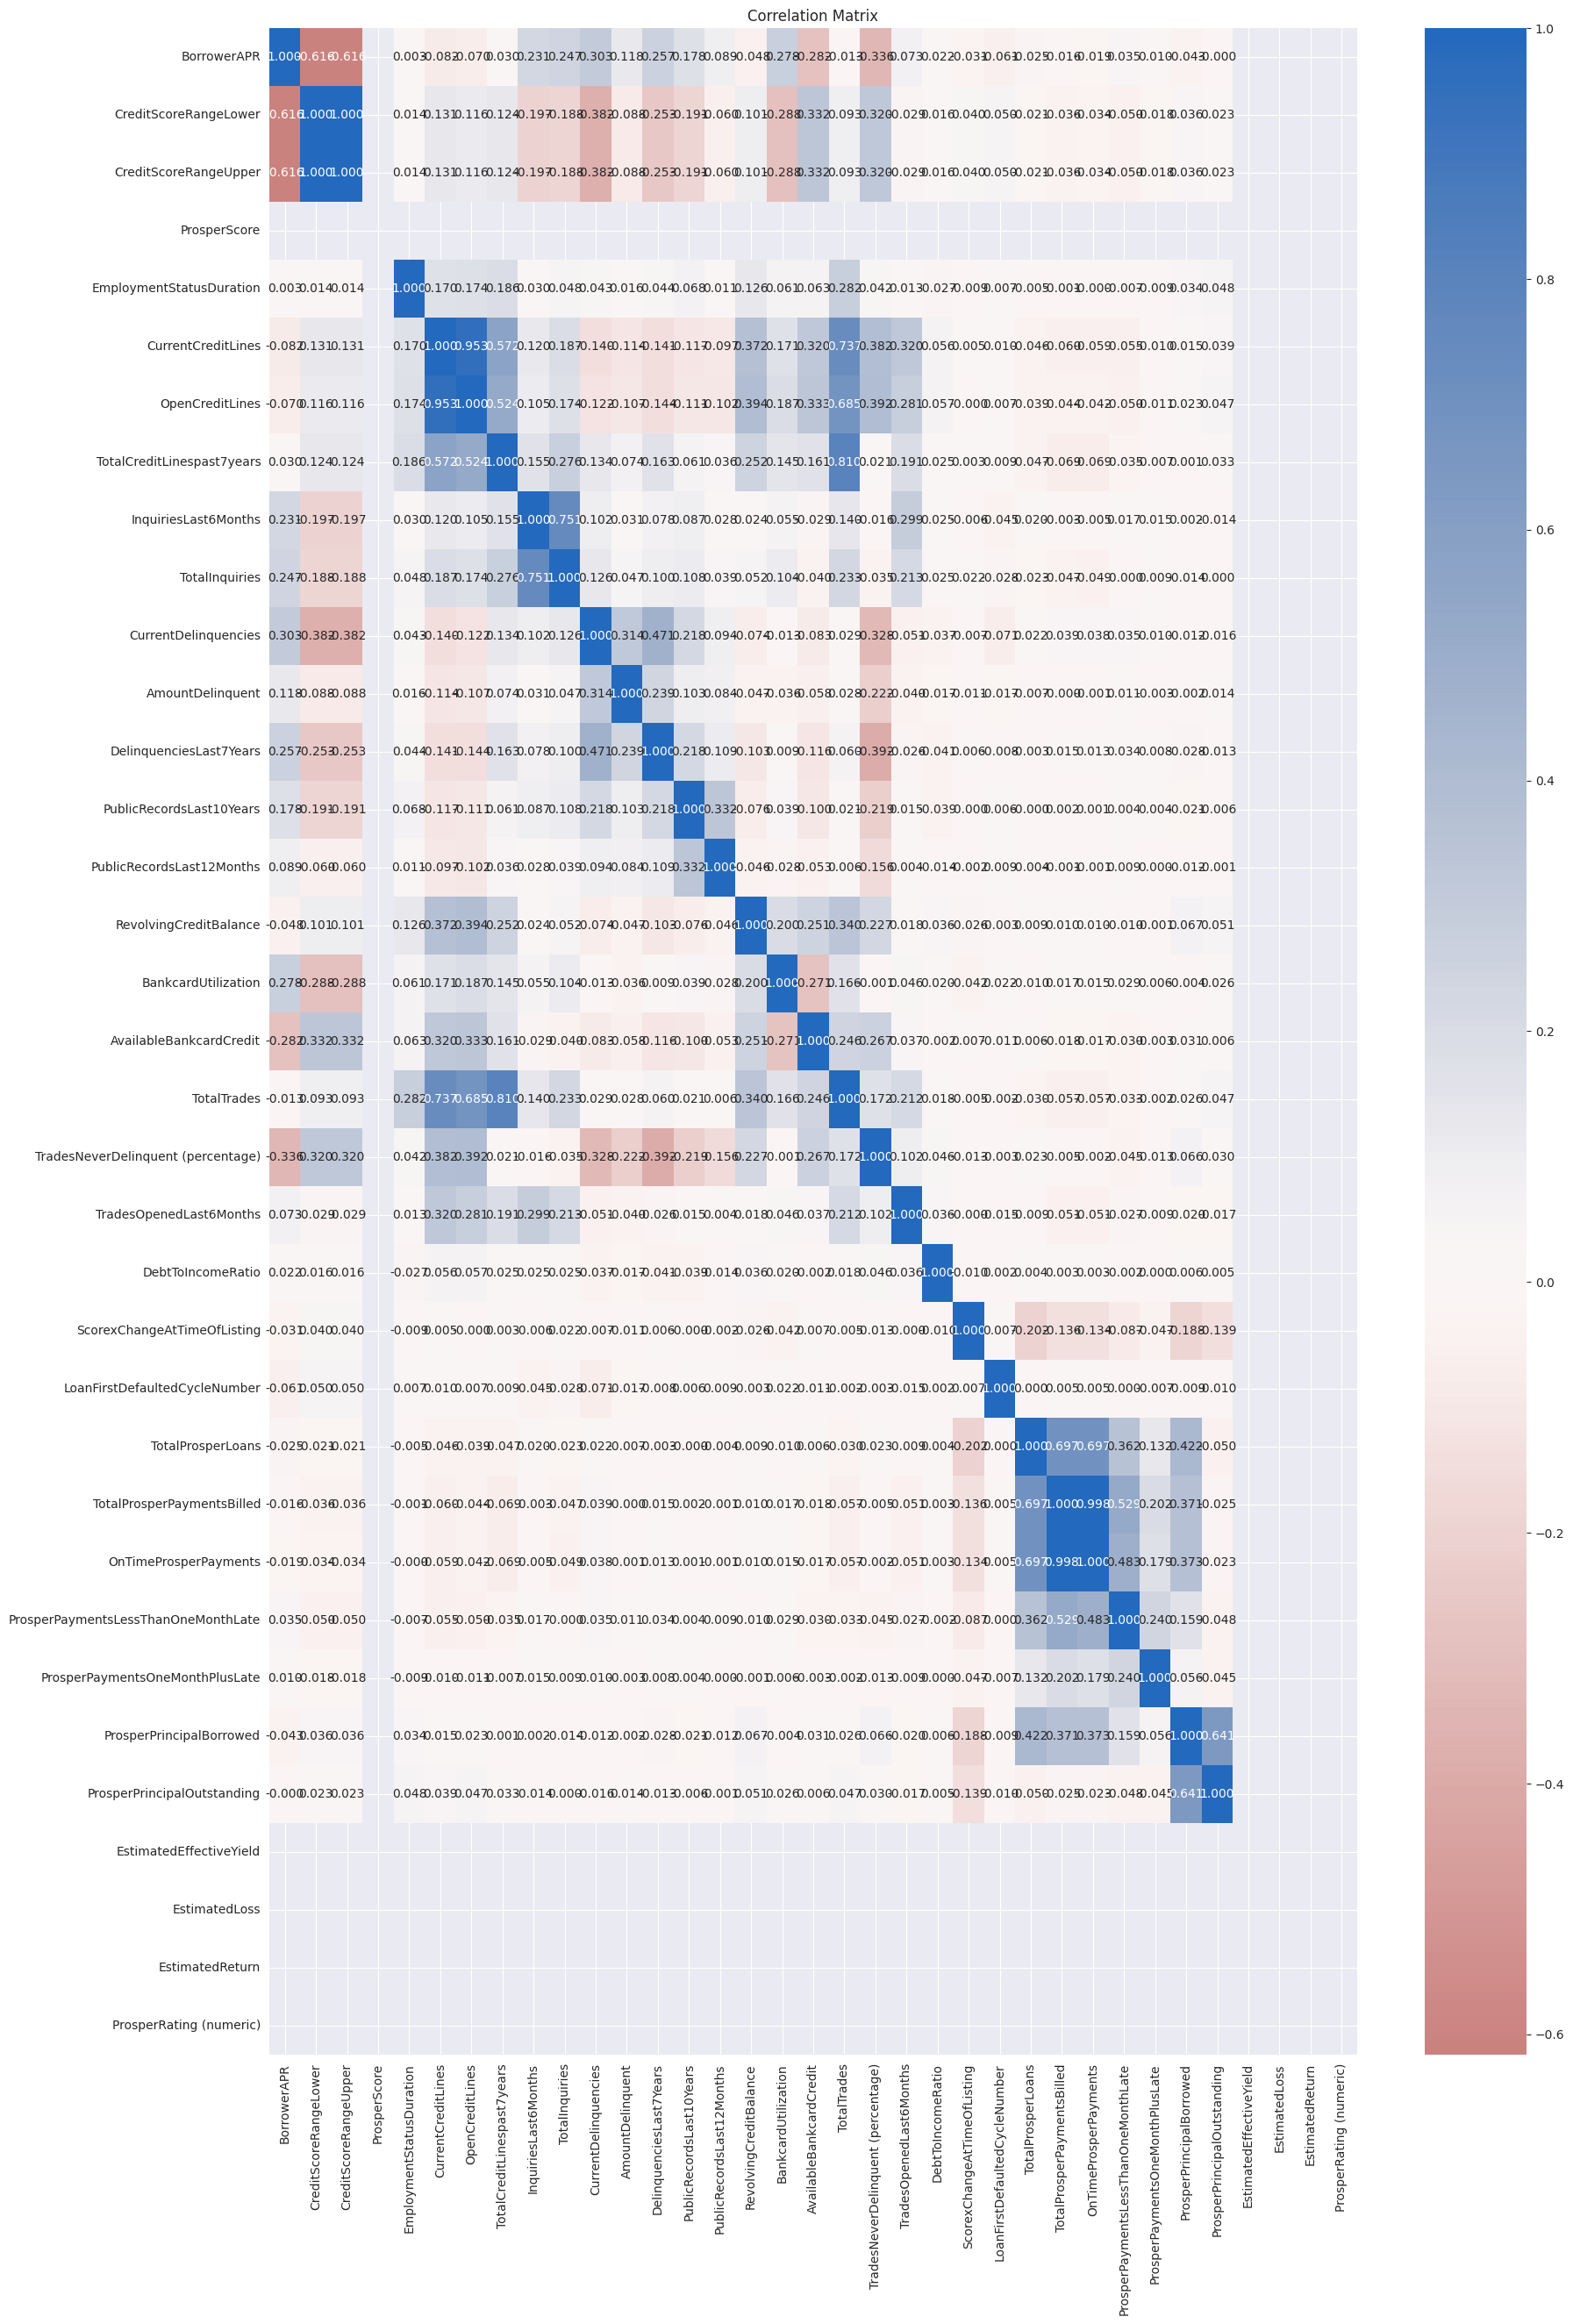

In [70]:
# Correlation matrix for all numeric variables
plt.figure(figsize = [20, 30])
sns.heatmap(df_Cd[cols].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix')
plt.margins(x = 0.5, y= 0.3)
plt.show()

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['CreditGrade','LoanStatus','ClosedDate','ProsperRating (Alpha)','BorrowerState','Occupation','EmploymentStatus','FirstRecordedCreditLine',
       'IsBorrowerHomeowner','CurrentlyInGroup','DateCreditPulled','IncomeRange','IncomeVerifiable','LoanOriginationQuarter',
       'MemberKey']

# Encode labels of multiple columns at once

df_Cd[cols] = df_Cd[cols].apply(LabelEncoder().fit_transform)

# Print head

df_Cd.head()

CreditGrade  Term  LoanStatus  ClosedDate  BorrowerAPR  BorrowerRate  \
0             3    36           2        1136      0.16516        0.1580   
2             6    36           2        1261      0.28269        0.2750   
11            3    36           2         536      0.15033        0.1325   
17            1    36           1         684      0.13202        0.1250   
21            4    36           2        1621      0.21488        0.2075   

    LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
0        0.1380                 0.168661       0.080306         0.096068   
2        0.2400                 0.168661       0.080306         0.096068   
11       0.1225                 0.168661       0.080306         0.096068   
17       0.1175                 0.168661       0.080306         0.096068   
21       0.1975                 0.168661       0.080306         0.096068   

    ProsperRating (numeric)  ProsperRating (Alpha)  ProsperScore  \
0                  4.072243                      0      5.950067   
2                  4.072243                      0      5.950067   
11                 4.072243                      0      5.950067   
17                 4.072243                      0      5.950067   
21                 4.072243                      0      5.950067   

    ListingCategory (numeric)  BorrowerState  Occupation  EmploymentStatus  \
0                           0              5          34                 6   
2                           0             10          34                 2   
11                          0              4          65                 1   
17                          0              4          40                 2   
21                          0             22          40                 1   

    EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup  \
0                   2.000000                    1                 1   
2                  96.071582                    0                 1   
11                 19.000000                    0                 0   
17                 96.071582                    1                 1   
21                 36.000000                    0                 1   

    DateCreditPulled  CreditScoreRangeLower  CreditScoreRangeUpper  \
0              14346                  640.0                  659.0   
2               6445                  480.0                  499.0   
11             15487                  640.0                  659.0   
17              2786                  760.0                  779.0   
21             16462                  620.0                  639.0   

    FirstRecordedCreditLine  CurrentCreditLines  OpenCreditLines  \
0                      5965            5.000000         4.000000   
2                      6222           10.317192         9.260164   
11                     5668            2.000000         2.000000   
17                     2310           10.317192         9.260164   
21                     6487            4.000000         4.000000   

    TotalCreditLinespast7years  OpenRevolvingAccounts  \
0                         12.0                      1   
2                          3.0                      0   
11                        10.0                      1   
17                        36.0                     16   
21                        13.0                      3   

    OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
0                          24.0                   3.0             3.0   
2                           0.0                   0.0             1.0   
11                         40.0                   3.0             5.0   
17                        346.0                   7.0            17.0   
21                         15.0                   0.0             8.0   

    CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  \
0                    2.0        472.000000                      4.0   
2                    1.0       

In [72]:
df_Cd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28953 entries, 0 to 113927
Data columns (total 82 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CreditGrade                          28953 non-null  int64  
 1   Term                                 28953 non-null  int64  
 2   LoanStatus                           28953 non-null  int64  
 3   ClosedDate                           28953 non-null  int64  
 4   BorrowerAPR                          28953 non-null  float64
 5   BorrowerRate                         28953 non-null  float64
 6   LenderYield                          28953 non-null  float64
 7   EstimatedEffectiveYield              28953 non-null  float64
 8   EstimatedLoss                        28953 non-null  float64
 9   EstimatedReturn                      28953 non-null  float64
 10  ProsperRating (numeric)              28953 non-null  float64
 11  ProsperRating (Alpha)      

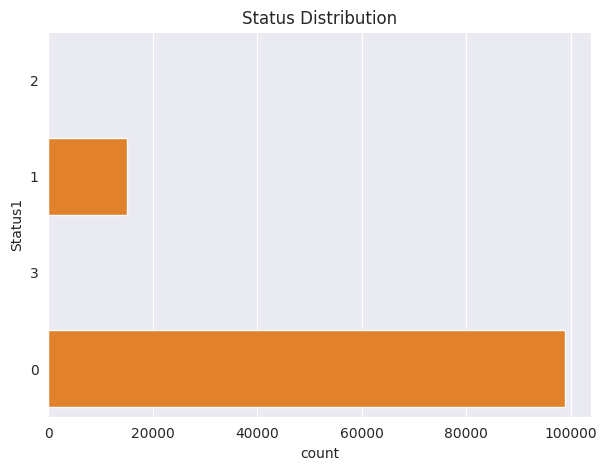

In [73]:
base_color = sns.color_palette()[1]
cat_order = df_Cd.LoanStatus.value_counts().index
plt.figure(figsize=[7, 5])
sns.countplot(data=df,y='Status1',color=base_color, order=cat_order);
plt.title('Status Distribution');

# Data Balancing

In [74]:
# Building a Model
X = df_Cd.drop(columns='Status1', axis=1)
Y = df_Cd['Status1']

In [95]:
status0 = df_Cd[df_Cd['Status1'] == 1]
status1 = df_Cd[df_Cd['Status1'] == 0]

In [96]:
print(status0.shape, status1.shape)

(9727, 82) (19226, 82)


In [101]:
from imblearn.over_sampling import SMOTE

# Assuming X is your feature matrix and Y is your target variable
smote = SMOTE(random_state=42)

# Fit and apply the SMOTE algorithm to balance the dataset
X_res, y_res = smote.fit_resample(X, Y)


In [104]:
print(X_res.shape, y_res.shape)

(38452, 81) (38452,)


In [106]:
# Splitting the data into training data & Testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=100)

In [107]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(30761, 81) (7691, 81) (30761,) (7691,)


# Mutual Information

In [108]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info

array([1.65681955e-02, 6.09040070e-03, 4.97814699e-01, 1.32751256e-01,
       1.26271808e-01, 1.48151246e-01, 1.47799231e-01, 0.00000000e+00,
       7.90258777e-04, 4.42419112e-03, 6.00940025e-03, 0.00000000e+00,
       3.51894498e-03, 4.65480729e-03, 3.88624852e-02, 5.49134944e-02,
       4.14719319e-03, 1.35432890e-01, 2.03705933e-03, 3.06072072e-03,
       1.76940782e-03, 1.96745004e-01, 1.99105849e-01, 2.08154769e-02,
       1.37547404e-01, 1.38183206e-01, 1.93814968e-01, 6.68031447e-03,
       1.33823680e-01, 1.88047557e-01, 2.09406295e-01, 1.14081306e-01,
       2.32810388e-02, 1.23494621e-01, 9.22193974e-02, 1.12060981e-02,
       3.67313146e-04, 1.37387844e-01, 2.62270812e-02, 1.43475265e-01,
       1.39589902e-01, 1.06459314e-01, 1.61357386e-01, 5.16561387e-03,
       6.26480866e-03, 7.88950459e-02, 1.11939309e-02, 1.85747172e-02,
       1.63334462e-02, 1.90885139e-02, 1.78406062e-02, 1.44634377e-02,
       7.13622497e-03, 1.00063381e-02, 6.93152630e-01, 6.10395573e-01,
      

In [109]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

LoanCurrentDaysDelinquent              0.693153
LoanFirstDefaultedCycleNumber          0.610396
LP_GrossPrincipalLoss                  0.596639
LP_NetPrincipalLoss                    0.590560
LoanStatus                             0.497815
LP_CustomerPrincipalPayments           0.482677
TotalInquiries                         0.209406
CreditScoreRangeUpper                  0.199106
CreditScoreRangeLower                  0.196745
TotalCreditLinespast7years             0.193815
InquiriesLast6Months                   0.188048
DebtToIncomeRatio                      0.161357
BorrowerRate                           0.148151
LenderYield                            0.147799
TotalTrades                            0.143475
TradesNeverDelinquent (percentage)     0.139590
OpenCreditLines                        0.138183
CurrentCreditLines                     0.137547
BankcardUtilization                    0.137388
EmploymentStatusDuration               0.135433
OpenRevolvingMonthlyPayment            0

<Axes: >

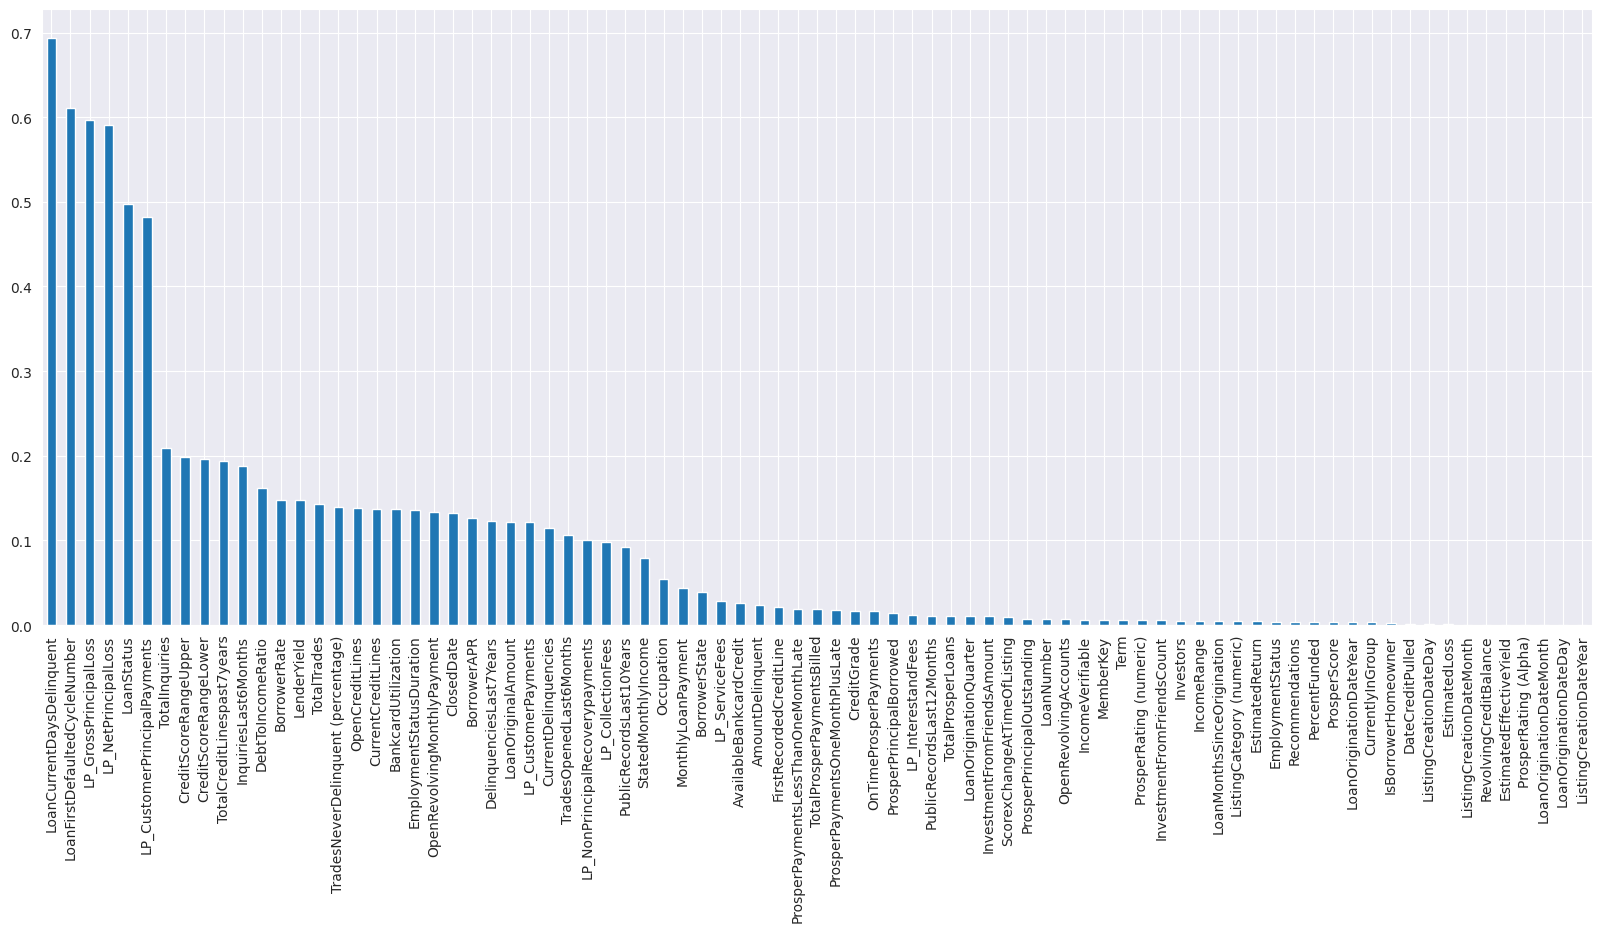

In [110]:

mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [111]:
from sklearn.feature_selection import SelectKBest

In [112]:
#Now we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, Y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['LoanStatus', 'LoanCurrentDaysDelinquent',
       'LoanFirstDefaultedCycleNumber', 'LP_GrossPrincipalLoss',
       'LP_NetPrincipalLoss'],
      dtype='object')

In [113]:
X_train_new = sel_five_cols.transform(X_train)
X_test_new =  sel_five_cols.transform(X_test)

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_new)
X_test_std = scaler.transform(X_test_new)

In [115]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# training the model
clf.fit(X_train_std, Y_train)

LogisticRegression()

In [116]:
y_pred = clf.predict(X_test_std)

In [117]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 99.36%


# PCA

In [118]:
from sklearn.preprocessing import StandardScaler


In [128]:
X_res.head()

CreditGrade  Term  LoanStatus  ClosedDate  BorrowerAPR  BorrowerRate  \
0            3    36           2        1136      0.16516        0.1580   
1            6    36           2        1261      0.28269        0.2750   
2            3    36           2         536      0.15033        0.1325   
3            1    36           1         684      0.13202        0.1250   
4            4    36           2        1621      0.21488        0.2075   

   LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
0       0.1380                 0.168661       0.080306         0.096068   
1       0.2400                 0.168661       0.080306         0.096068   
2       0.1225                 0.168661       0.080306         0.096068   
3       0.1175                 0.168661       0.080306         0.096068   
4       0.1975                 0.168661       0.080306         0.096068   

   ProsperRating (numeric)  ProsperRating (Alpha)  ProsperScore  \
0                 4.072243                      0      5.950067   
1                 4.072243                      0      5.950067   
2                 4.072243                      0      5.950067   
3                 4.072243                      0      5.950067   
4                 4.072243                      0      5.950067   

   ListingCategory (numeric)  BorrowerState  Occupation  EmploymentStatus  \
0                          0              5          34                 6   
1                          0             10          34                 2   
2                          0              4          65                 1   
3                          0              4          40                 2   
4                          0             22          40                 1   

   EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup  \
0                  2.000000                    1                 1   
1                 96.071582                    0                 1   
2                 19.000000                    0                 0   
3                 96.071582                    1                 1   
4                 36.000000                    0                 1   

   DateCreditPulled  CreditScoreRangeLower  CreditScoreRangeUpper  \
0             14346                  640.0                  659.0   
1              6445                  480.0                  499.0   
2             15487                  640.0                  659.0   
3              2786                  760.0                  779.0   
4             16462                  620.0                  639.0   

   FirstRecordedCreditLine  CurrentCreditLines  OpenCreditLines  \
0                     5965            5.000000         4.000000   
1                     6222           10.317192         9.260164   
2                     5668            2.000000         2.000000   
3                     2310           10.317192         9.260164   
4                     6487            4.000000         4.000000   

   TotalCreditLinespast7years  OpenRevolvingAccounts  \
0                        12.0                      1   
1                         3.0                      0   
2                        10.0                      1   
3                        36.0                     16   
4                        13.0                      3   

   OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
0                         24.0                   3.0             3.0   
1                          0.0                   0.0             1.0   
2                         40.0                   3.0             5.0   
3                        346.0                   7.0            17.0   
4                         15.0                   0.0             8.0   

   CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  \
0                   2.0        472.000000                      4.0   
1                   1.0        984.507059                      0.0   
2               

In [129]:
scaler = StandardScaler()
X_sp = scaler.fit_transform(X_res)

In [132]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca=pca.fit_transform(X_sp)


In [133]:
X_pca.shape


(38452, 45)

In [134]:
pca.explained_variance_ratio_


array([0.12823534, 0.09024401, 0.06633031, 0.05523296, 0.04170675,
       0.04063601, 0.0372877 , 0.03010639, 0.02855381, 0.02334724,
       0.02193492, 0.02148664, 0.02074826, 0.01939526, 0.01649821,
       0.01612693, 0.01522937, 0.01518847, 0.01476734, 0.01362104,
       0.01353657, 0.01328465, 0.01319803, 0.01295149, 0.01241741,
       0.01177413, 0.01124054, 0.01070055, 0.0106009 , 0.01038188,
       0.0102868 , 0.00962312, 0.00930673, 0.0089657 , 0.008749  ,
       0.00860393, 0.00844778, 0.00821463, 0.00802237, 0.00720121,
       0.00690045, 0.00648999, 0.00584265, 0.00562335, 0.00531671])

In [135]:
pca.n_components_

45

In [136]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_sp, y_res ,test_size=0.20, random_state=100)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# training the model
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))



Accuracy: 99.18%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [137]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

In [138]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3917
           1       0.99      1.00      0.99      3774

    accuracy                           0.99      7691
   macro avg       0.99      0.99      0.99      7691
weighted avg       0.99      0.99      0.99      7691



In [139]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = "entropy")

In [140]:

model.fit(X_train_pca, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [141]:
y_pred = model.predict(X_test_pca)